# KU Galaxy Evolution Group - Spring 2022
## Christian Harris

In [1]:
# Imports

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
# Show plots inline
%matplotlib inline 

from astropy.table import Table
from astropy.io import fits, ascii
from astropy import units as u
from astropy.coordinates import SkyCoord

import pandas as pd 
pd.set_option('display.max_columns', 500) # Is this needed?

In [2]:
# Path Definitions

root = '/home/astrobits/school/research/data/'
version = 'DR1/'
dirr  =  root + version

catdir = dirr + 'CATS/'
photdir = dirr + 'PHOTOMETRY/'

In [3]:
# Define Cosmology

from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

# Function Definitions

In [4]:
def ABmag(fluxValues, zeroPoint):
    return (-2.5)*np.log10(fluxValues) + zeroPoint

# Import Catalogs

## Clusters.fits
Information about each of the 26 $\underline{clusters}$

In [5]:
clusters = catdir + 'Clusters.fits'

# Clusters.fits -> Astropy Table -> Pandas Dataframe
cluster_table = Table( fits.getdata( clusters ) ).to_pandas() 
cluster_table['cluster'] = cluster_table['cluster'].str.rstrip().values # remove unnecessary spaces

print(cluster_table.columns)

Index(['cluster', 'fullname', 'cluster_id', 'RA_Best', 'DEC_Best', 'RA_GMOS',
       'DEC_GMOS', 'PA_deg', 'Redshift', 'vdisp', 'vdisp_err', 'gogreen_m1',
       'gogreen_m2', 'gogreen_m3', 'gogreen_m4', 'gogreen_m5', 'gogreen_m6',
       'gclass_m1', 'gclass_m2', 'gclass_m3', 'gclass_m4', 'gclass_m5',
       'Kphot_cat', 'photoz_cat', 'stelmass_cat', 'IMAGE_U', 'IMAGE_B',
       'IMAGE_G', 'IMAGE_V', 'IMAGE_R', 'IMAGE_I', 'IMAGE_Z', 'IMAGE_J',
       'IMAGE_J1', 'IMAGE_Y', 'IMAGE_K', 'IMAGE_IRAC1', 'Preimage'],
      dtype='object')


## Photo.fits
$\underline{Merged}$ photometric catalogue

In [6]:
photfile = catdir + 'Photo.fits'

# Photo.fits -> Astropy Table -> Pandas Dataframe
phot_table = Table( fits.getdata(photfile) ).to_pandas()

print(phot_table.columns)

Index(['Cluster', 'cPHOTID', 'SPECID', 'ra', 'dec', 'zspec',
       'Redshift_Quality', 'zphot', 'zphot_l68', 'zphot_u68', 'UMINV', 'VMINJ',
       'Star', 'K_flag', 'totmask', 'Mstellar', 'u_tot', 'g_tot', 'r_tot',
       'i_tot', 'z_tot', 'y_tot', 'V_tot', 'B_tot', 'J_tot', 'H_tot', 'K_tot',
       'Ks_tot', 'IRAC1_tot', 'IRAC2_tot', 'IRAC3_tot', 'IRAC4_tot',
       'IA484_tot', 'IA527_tot', 'IA624_tot', 'IA679_tot', 'IA738_tot',
       'IA767_tot', 'IB427_tot', 'IB464_tot', 'IB505_tot', 'IB574_tot',
       'IB709_tot', 'IB827_tot', 'fuv_tot', 'nuv_tot', 'mips24_tot', 'eu_tot',
       'eg_tot', 'er_tot', 'ei_tot', 'ez_tot', 'ey_tot', 'eV_tot', 'eB_tot',
       'eJ_tot', 'eH_tot', 'eK_tot', 'eKs_tot', 'eIRAC1_tot', 'eIRAC2_tot',
       'eIRAC3_tot', 'eIRAC4_tot', 'eIA484_tot', 'eIA527_tot', 'eIA624_tot',
       'eIA679_tot', 'eIA738_tot', 'eIA767_tot', 'eIB427_tot', 'eIB464_tot',
       'eIB505_tot', 'eIB574_tot', 'eIB709_tot', 'eIB827_tot', 'efuv_tot',
       'enuv_tot', 'emips24_tot

## Redshift_catalogue.fits
Redshift catalogue with one entry for each $\underline{spectrum}$

In [7]:
zcatfile = catdir + 'Redshift_catalogue.fits'

# Redshift_catalogue.fits -> Astropy Table -> Pandas Dataframe
redshift_table = Table( fits.getdata( zcatfile ) ).to_pandas() 
redshift_table['Cluster'] = redshift_table['Cluster'].str.rstrip().values # remove unnecessary spaces

print (redshift_table.columns)

Index(['Cluster', 'SPECID', 'RA(J2000)', 'DEC(J2000)', 'OBJClass', 'Redshift',
       'Redshift_Quality', 'EXTVER', 'Spec_Flag', 'SNR_8500_VAR',
       'SNR_8500_RMS', 'D4000', 'eD4000', 'EWOII', 'eEWOII', 'EWHdelta',
       'eEWHdelta', 'EWOII_model', 'eEWOII_model', 'F_OII', 'eF_OII',
       'SFR_OII', 'eSFR_OII', 'delta_BIC', 'member_Clean', 'member_EM',
       'member'],
      dtype='object')


# Plots

### 1) Histogram of K-band magnitudes from Photo.fits

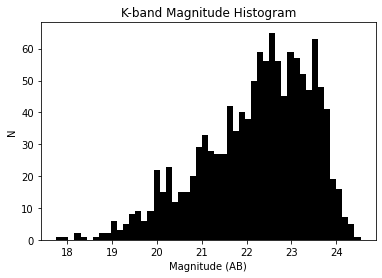

In [13]:
# Define cluster of interest
targetCluster = 'SPT2106'

# From targetCluster
# Select all galaxies (Star==0)
# That have a K-band flux (Ks_tot)
# With an image in each filter (totmask==0)
# And measurement using SExtractor (K_flag==0)
kFlux = phot_table.query('Cluster==@targetCluster and Star==0 and K_flag==0 and totmask==0')['Ks_tot'].dropna().values

# Calculate the magnitude of each galaxy, excluding those with negative flux
kMag = ABmag(kFlux[kFlux > 0], 25)

# Plot the histogram
fig = plt.figure()
plt.hist(kMag, bins=50, color='k')
plt.title('K-band Magnitude Histogram')
plt.xlabel('Magnitude (AB)')
plt.ylabel('N')
plt.show()

### 2) Histogram of SPT2106 redshifts
Using spectroscopic where available and photometric otherwise

Number of excluded points (z>3):  20


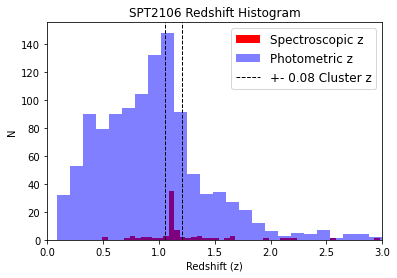

In [33]:
### GET CLUSTER REDSHIFT DATA ###

# Define cluster property of interest
targetProperty = 'Redshift'

# Find the value of targetProperty for targetCluster
clusterZ = cluster_table.query('cluster==@targetCluster')[targetProperty].values

## GET GALAXY REDSHIFT DATA

# Select the galaxies within targetCluster with spectroscopic redshifts
galSpecZ = phot_table.query('Cluster==@targetCluster and Star==0 and K_flag==0 and totmask==0')['zspec'].dropna().values

# Select the galaxies within targetCluster with photometric redshifts (but no spectroscopic)
galPhotZ = phot_table.query('Cluster==@targetCluster and Star==0 and K_flag==0 and totmask==0 and zspec.isnull()')['zphot'].dropna().values

# Information regarding excluded points
print('Number of excluded points (z>3): ', len(galSpecZ[galSpecZ > 3])+len(galPhotZ[galPhotZ > 3]))

# Plot the histogram
fig = plt.figure()
plt.hist(galSpecZ, bins=50, color='r', label='Spectroscopic z')
plt.hist(galPhotZ, bins=50, alpha=0.5, color='b', label='Photometric z')
plt.title('SPT2106 Redshift Histogram')
plt.axvline(clusterZ+0.08, c='k', linestyle='dashed', linewidth=1, label='+- 0.08 Cluster z')
plt.axvline(clusterZ-0.08, c='k', linestyle='dashed', linewidth=1,)
plt.xlabel('Redshift (z)')
plt.xlim(0,3)
plt.ylabel('N')
plt.legend(fontsize='large')
plt.show()